# Climate AI

## Upload an infrared image of a PV cell and see what the model predicts

In [70]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import pandas as pd
import ipywidgets as widgets
import io
from PIL import Image

In [3]:
model = tf.keras.models.load_model('saved_model/CNN_1')

In [7]:
classes = {0: 'Cell', 1: 'Cell-Multi', 2: 'Cracking', 3: 'Diode', 4: 'Diode-Multi', 5: 'Hot-Spot', 6: 'Hot-Spot-Multi', 7: 'No-Anomaly', 8: 'Offline-Module', 9: 'Shadowing', 10: 'Soiling', 11: 'Vegetation'}

In [124]:
def predict(model, filepath, threshold):
    data = img.imread(filepath, format='JPG')
    pred_proba = model.predict(data.reshape(1, 40, 24, 1))
    plt.imshow(data)
    pred = np.argmax(pred_proba, axis = 1)
    pred = classes.get(pred[0])
    plt.title("Predicted: " + pred)
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

In [67]:
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

FileUpload(value={}, accept='image/*', description='Upload')

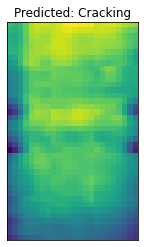

In [125]:
try:
    for name, file_info in uploader.value.items():
        image = io.BytesIO(file_info['content'])
    im1 = Image.open(image)
    im1.save('test.jpg')
    predict(model, 'test.jpg', 0.5)
except:
    print("Upload a single-channel, 40x24 pixel image")